In [205]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#결측치처리
import missingno as msno

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


In [207]:
df = pd.read_csv('kaggle/Amazon Sale Report.csv')

In [208]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [210]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [211]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [212]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [215]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [220]:
#index컬럼과 Unnamed: 22컬럼을 삭제한다.

In [222]:
df = df.drop(df.columns[0], axis =1)
df = df.drop(df.columns[-1], axis=1)

In [225]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [227]:
#중복된 행들을 체크한다

In [229]:
df[df.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
98955,407-4853873-4978725,06-22-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,1,INR,1163.0,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [230]:
df = (df.drop_duplicates(keep='first').reset_index(drop=True))
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128964,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128965,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128966,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128967,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [232]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
dtype: int64

In [234]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128964,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128965,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128966,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128967,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [236]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

<!-- ### 데이터 명세서
Stauts
Fulfilment
Sales Channel
ship-service-level
Style
SKU
Category
Size
ASIN
Courier Status
Qty
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
promotion-ids
B2B
fulfilled-by  -->

## 📋 데이터 컬럼 설명

| 컬럼명               | 설명 |
|---------------------|------|
| `index`             | CSV 저장 시 자동 생성된 행 번호 (삭제 가능) |
| `Order ID`          | 주문 고유 식별 번호 |
| `Date`              | 주문 날짜 (형식: MM-DD-YY) |
| `Status`            | 주문 상태 (`Shipped`, `Cancelled` 등) |
| `Fulfilment`        | 주문 이행 주체 (`Amazon`, `Merchant`) |
| `Sales Channel`     | 판매 채널 (`Amazon.in` 등) |
| `ship-service-level`| 배송 서비스 수준 (`Standard`, `Expedited` 등) |
| `Style`             | 상품 스타일 코드 |
| `SKU`               | 재고 관리 코드 (Stock Keeping Unit) |
| `Category`          | 상품 카테고리 (예: kurta, Top, Set 등) |
| `Size`              | 상품 사이즈 |
| `ASIN`              | 아마존 고유 상품 식별자 |
| `Courier Status`    | 택배 상태 (`Delivered`, `Out for delivery` 등) |
| `Qty`               | 주문 수량 |
| `currency`          | 통화 단위 (예: INR) |
| `Amount`            | 주문 금액 |
| `ship-city`         | 배송 도시 |
| `ship-state`        | 배송 주/도 |
| `ship-postal-code`  | 배송 우편번호 |
| `ship-country`      | 배송 국가 |
| `promotion-ids`     | 적용된 프로모션 코드 (결측 많음) |
| `B2B`               | 기업 거래 여부 (True/False) |
| `fulfilled-by`      | 구체적인 이행 주체 (`Easy Ship`, `FBA` 등, 결측 많음) |
| `Unnamed: 22`       | 의미 없는 빈 열 (삭제 추천) |


### 결측치 처리

In [241]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
dtype: int64

In [243]:
#결측치 분포를 알아보자

<Axes: >

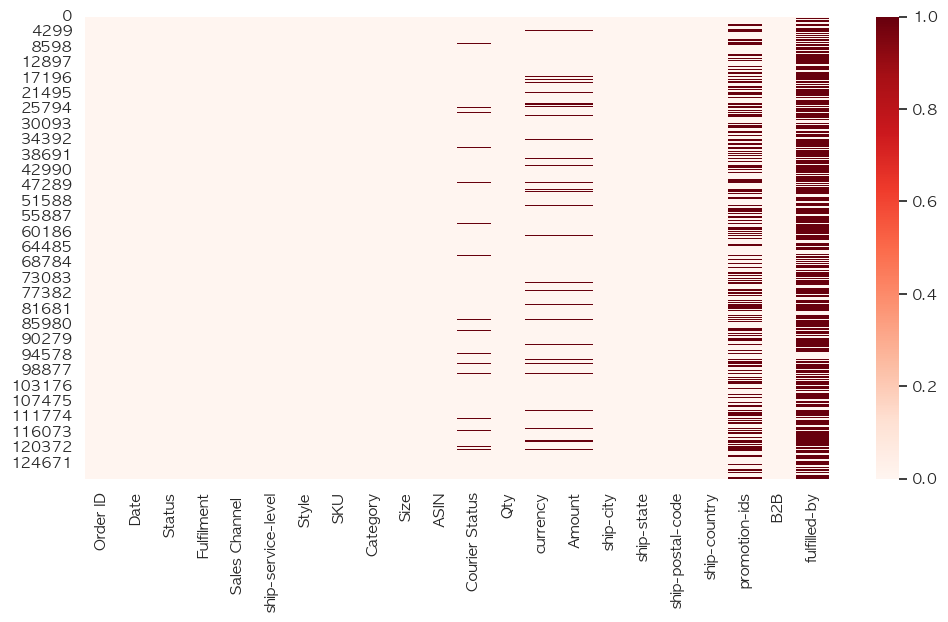

In [245]:
sns.heatmap(df.isnull(), cmap='Reds')

<Axes: >

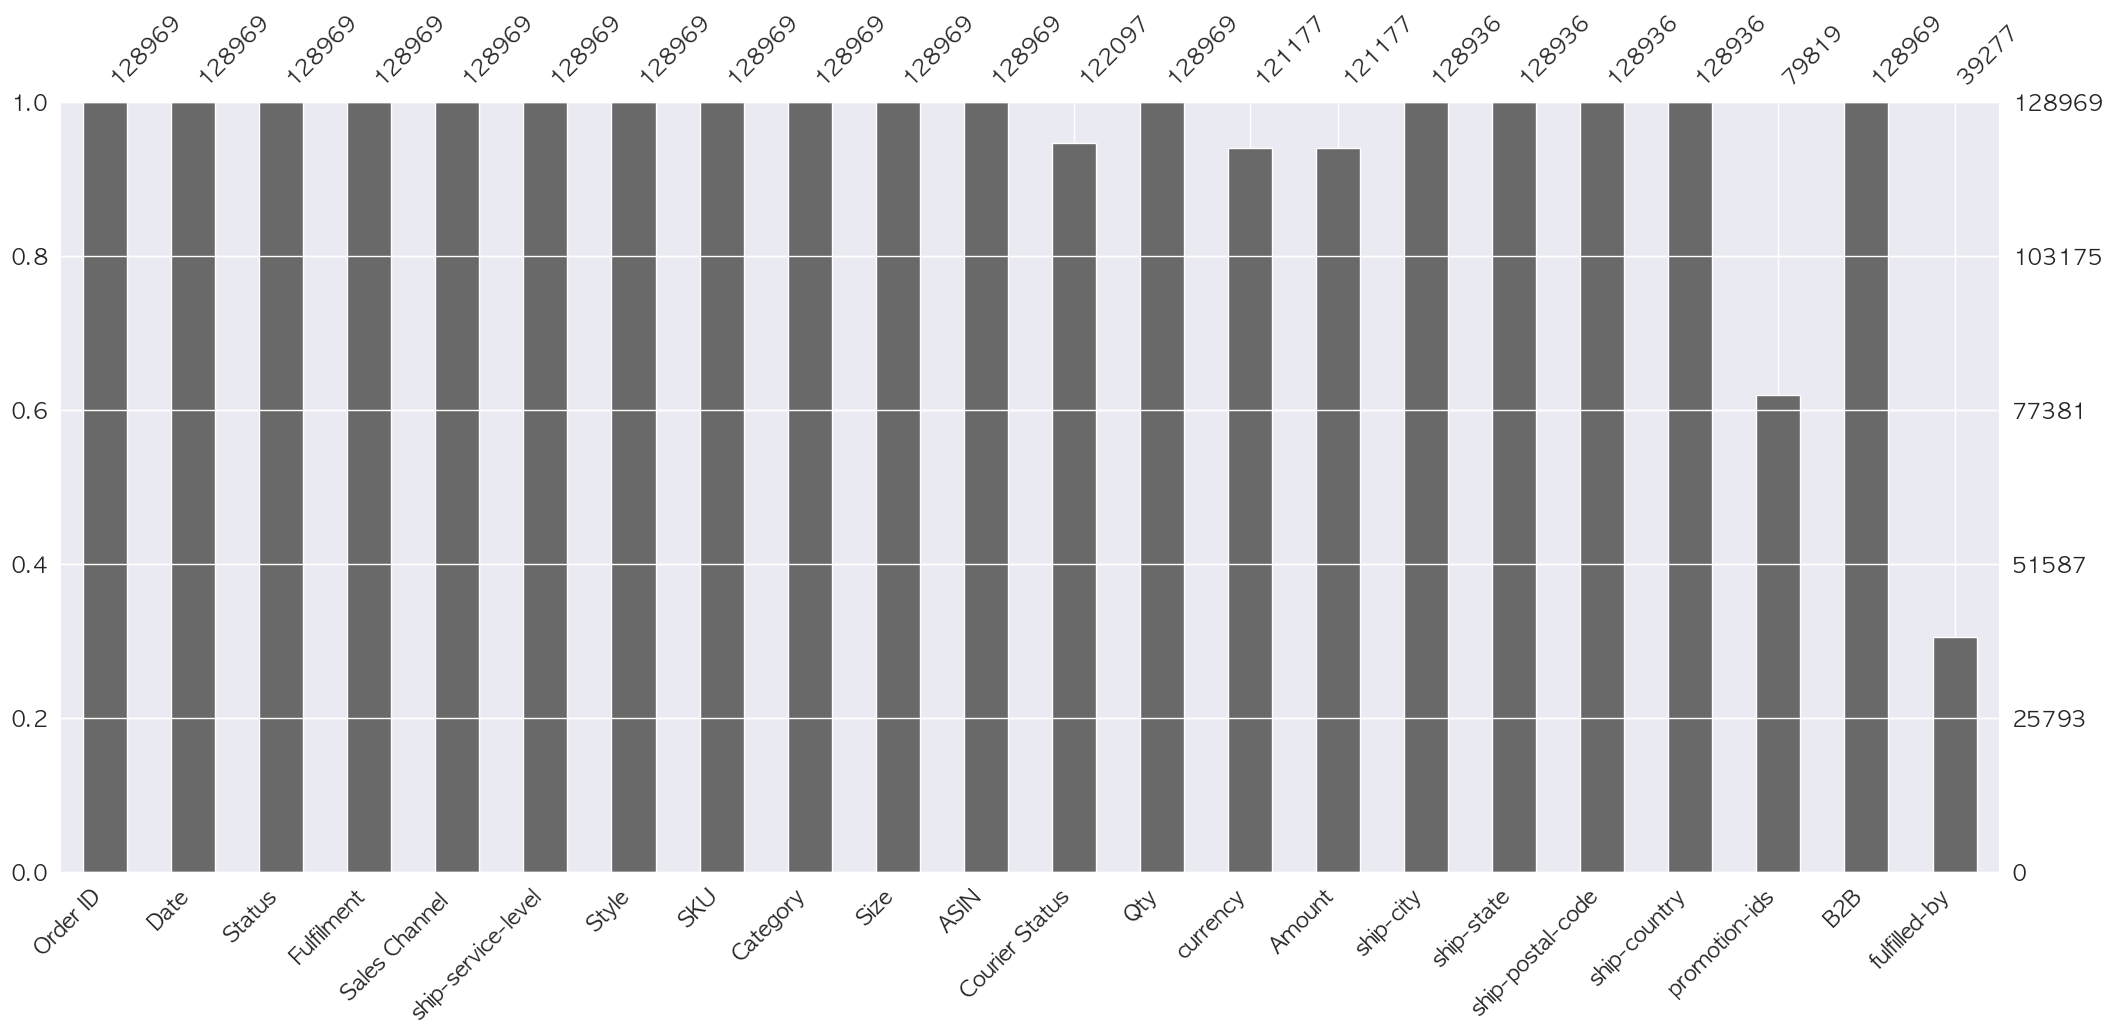

In [246]:
msno.bar(df)

In [247]:
#막대그래프의 높이가 낮을수록 결측치가 많다는 것을 의미함
# promotion-ids, fulfilled-by컬럼은 결측치가 많으므로 삭제하자
df = df.drop(['promotion-ids','fulfilled-by'], axis=1)
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128964,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128965,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128966,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128967,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False


In [248]:
df.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
currency              7792
Amount                7792
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
B2B                      0
dtype: int64

In [249]:
###결측치의 비율, 데이터 타입 알아보기
df_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100,
    'Data Type': df.dtypes
})
df_info = df_info[df_info['Missing Count'] > 0]
df_info

,Missing Count,Missing %,Data Type
Courier Status,6872,5.328412,object
currency,7792,6.041762,object
Amount,7792,6.041762,float64
ship-city,33,0.025588,object
ship-state,33,0.025588,object
ship-postal-code,33,0.025588,float64
ship-country,33,0.025588,object


In [250]:
#결측치를 최빈값과 중앙값으로 채워준다
have_null_coll = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for i in have_null_coll:
    mode = df[i].mode()[0]
    df[i] = df[i].fillna(mode)

df['Amount'] = df['Amount'].fillna(df['Amount'].median())


# 시각화

### 1. 카테고리별 총 매출 상위 5개


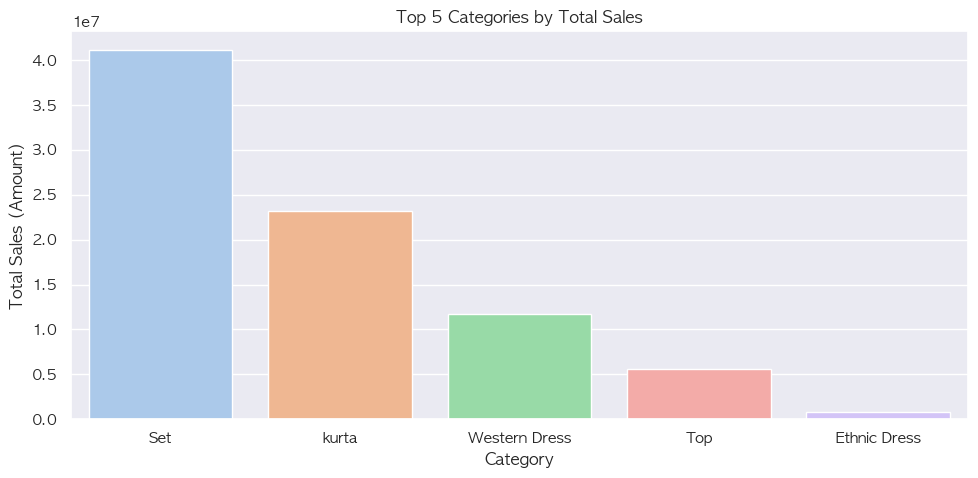

In [253]:
# 카테고리별 총 매출 상위 5개만 추출
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')
plt.title('Top 5 Categories by Total Sales')
plt.ylabel('Total Sales (Amount)')
plt.tight_layout()
plt.show()


### 2.도시별 주문 금액 알아보기

In [255]:
### 도시별 매출 top 10 알아보기
df['ship-city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [256]:
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
city_sales

ship-city
BENGALURU    7190800.99
HYDERABAD    5229172.82
MUMBAI       3861156.80
NEW DELHI    3822599.78
CHENNAI      3274800.74
PUNE         2458579.18
KOLKATA      1497258.87
GURUGRAM     1273043.74
THANE        1061225.29
LUCKNOW       996846.34
Name: Amount, dtype: float64

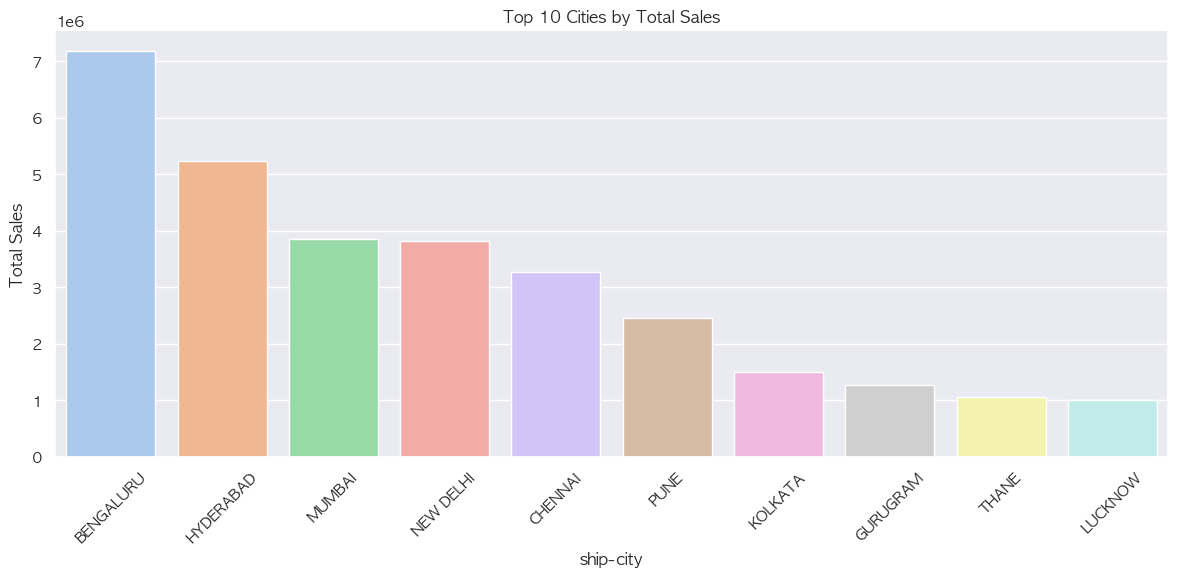

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시리즈를 DataFrame으로 변환
city_sales_df = city_sales.reset_index()  # 'ship-city'가 컬럼으로 올라옴

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=city_sales_df, x='ship-city', y='Amount', palette='pastel')
plt.title('Top 10 Cities by Total Sales')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [259]:
df['B2B'].value_counts()

B2B
False    128098
True        871
Name: count, dtype: int64

### 3. B2B 고객 유무에 따른 평균 매출 차이

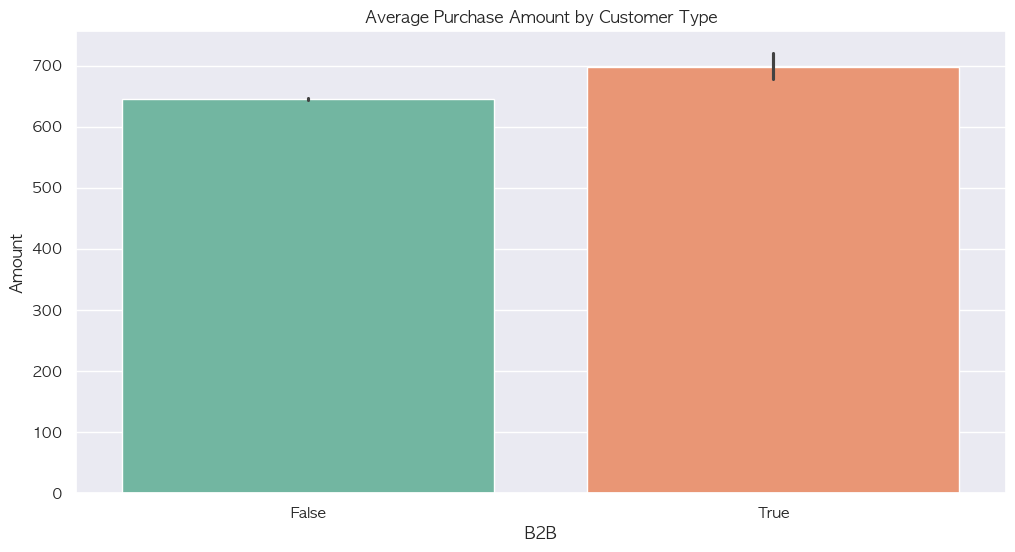

In [261]:
sns.barplot(data=df, x='B2B', y='Amount', palette='Set2', estimator=np.mean)
df['Customer Type'] = df['B2B'].map({0: 'General', 1: 'B2B'})
sns.barplot(data=df, x='Customer Type', y='Amount', palette='Set2', estimator=np.mean)
plt.title('Average Purchase Amount by Customer Type')
plt.show()


### 4. 가장 매출이 높았던 날짜 top5


In [266]:
orders_date = df.groupby('Date')['Amount'].sum().sort_values(ascending=False).head(5)
orders_date

Date
05-04-22    1298904.17
05-03-22    1288420.59
05-02-22    1261262.06
04-14-22    1181247.56
04-20-22    1150611.41
Name: Amount, dtype: float64

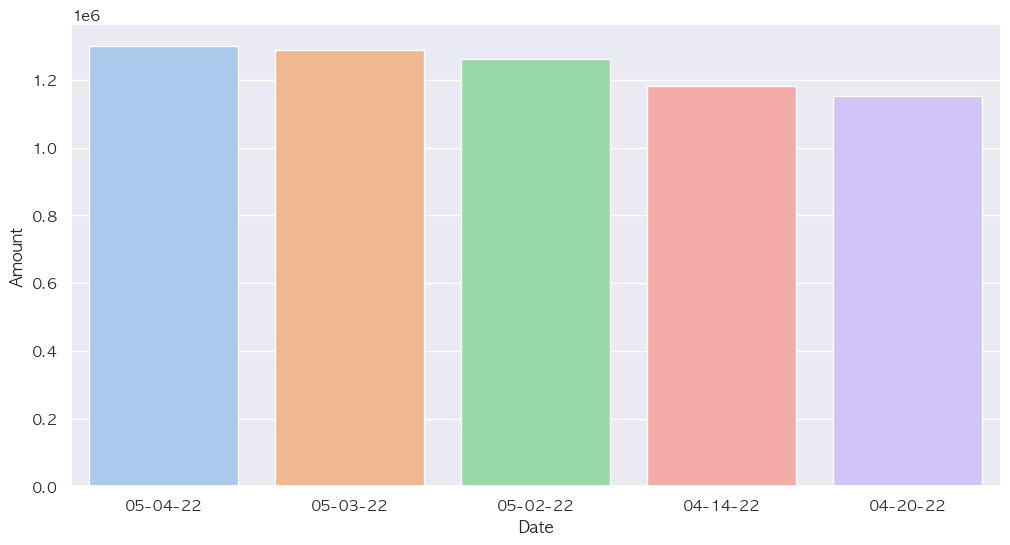

In [269]:
sns.barplot(data=orders_date, palette='pastel')
plt.show()


In [273]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Customer Type'],
      dtype='object')

### 5. 스타일별 매출 탑 10

In [277]:
style_sales = df.groupby('Style')['Amount'].sum().sort_values(ascending=False).head(10)
style_sales

Style
JNE3797    3072027.00
J0230      2025460.48
SET268     1381363.56
J0341      1330982.87
J0003      1064253.75
JNE3405     943017.36
J0008       860914.96
SET345      782692.79
SET324      767286.82
JNE3800     749413.80
Name: Amount, dtype: float64

### 6. 주문 채널별 매출 확인

In [279]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Customer Type'],
      dtype='object')

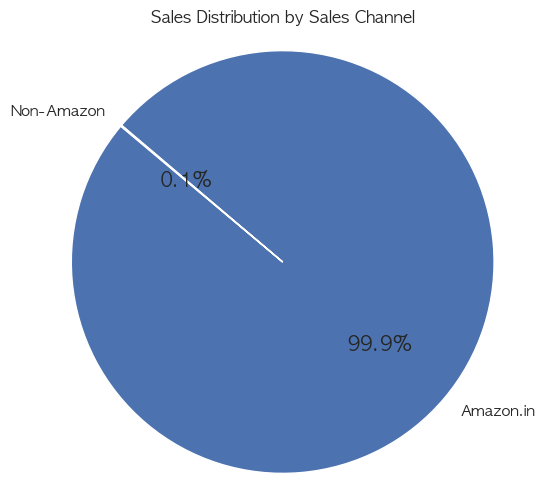

In [280]:
channel_sales = df.groupby('Sales Channel ')['Amount'].sum().sort_values(ascending=False)
# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(channel_sales.values,
        labels=channel_sales.index,
        autopct='%.1f%%',
        startangle=140,
        )
plt.title('Sales Distribution by Sales Channel')
plt.axis('equal')  # 원형으로 맞춤
plt.show()

###  7. 빠른 배송과 매출

<function matplotlib.pyplot.show(close=None, block=None)>

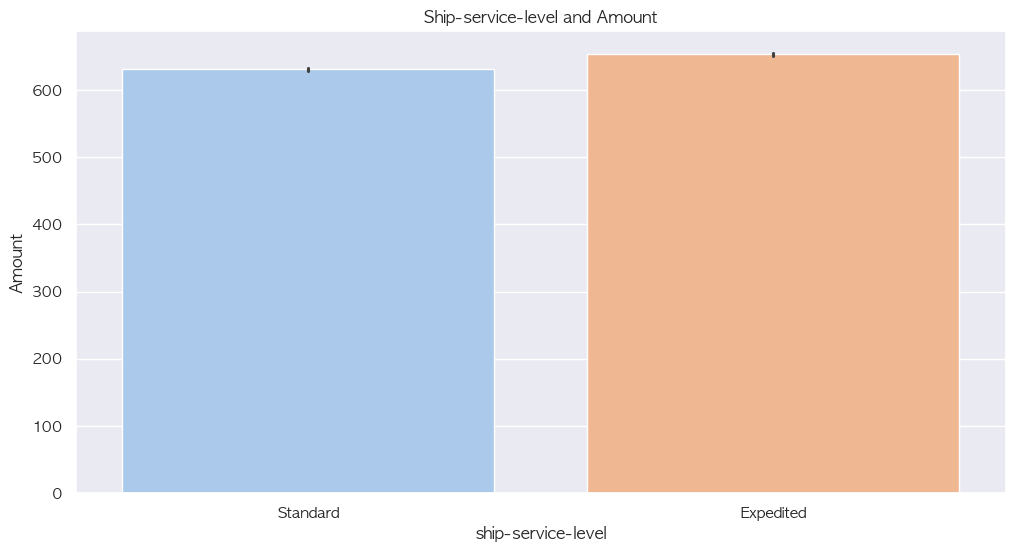

In [282]:
sns.barplot(data=df, x='ship-service-level', y='Amount', estimator=np.mean, palette='pastel')
plt.title('Ship-service-level and Amount')
plt.show